# Final Project Big Data - Clustering

- Name: Kurnia Cahya Febryanto
- Student ID: 5025201073
- Class: Big Data A

## Table of Contents
1. [Dataset Description](#dataset-description)
   - [Source of the Dataset](#source-of-the-dataset)
   - [Description of the Dataset](#description-of-the-dataset)
2. [Data Acquisition](#data-acquisition)
   - [Setting Up Kaggle API](#setting-up-kaggle-api)
   - [Downloading Dataset](#downloading-dataset)
3. [Setting Up the Environment](#setting-up-the-environment)
   - [Installation of Dependencies](#installation-of-dependencies)
   - [Setting Up Apache Spark](#setting-up-apache-spark)
4. [Data Loading and Exploration](#data-loading-and-exploration)
   - [Loading Dataset into Spark DataFrame](#loading-dataset-into-spark-dataframe)
   - [Initial Data Exploration](#initial-data-exploration)
5. [Data Preprocessing](#data-preprocessing)
   - [Handling Missing Values](#handling-missing-values)
   - [Feature Scaling/Normalization](#feature-scalingnormalization)
6. [Feature Engineering](#feature-engineering)
   - [Feature Selection](#feature-selection)
   - [Feature Preparation](#feature-preparation)
7. [Model Building](#model-building)
   - [Choice of Clustering Algorithm](#choice-of-clustering-algorithm)
   - [K-Means Clustering Algorithm](k-means-clustering-algorithm)
   - [Reason for Choosing the Algorithm](#reason-for-choosing-the-algorithm)
8. [Parameter Tuning](#parameter-tuning)
   - [Initial Model Training](#initial-model-training)
   - [Hyperparameter Tuning](#hyperparameter-tuning)
   - [Retraining Model with Optimized Parameters](#retraining-model-with-optimized-parameters)
9. [Model Evaluation](#model-evaluation)
   - [Elbow Method](#elbow-method)
   - [Silhouette Score](#silhouette-score)
10. [Visualization](#visualization)
    - [Data Visualization during Preprocessing](#data-visualization-during-preprocessing)
    - [Data Visualization during Evaluation](#data-visualization-during-evaluation)
11. [Conclusion](#conclusion)
12. [References](#references)

## Dataset Description


### Source of the Dataset

The dataset used in this project is hosted on Kaggle, specifically found at this location:
[Airplane Crashes Since 1908](https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908)
To use this dataset, you'll need to download it from Kaggle and upload it to your working environment.

### Description of the Dataset

The dataset, titled "Airplane Crashes and Fatalities Since 1908", provides a comprehensive history of airplane
crashes throughout the world from 1908 to the present. Originally hosted by Open Data by Socrata,
it is no longer available from the original source and is now hosted on Kaggle.

The dataset contains various information about each crash, including:

- The date of the crash
- The type of airplane
- The operator of the airplane
- The flight's origin and destination
- Information about the number of passengers, survivors, and fatalities

## Data Acquisition

### Setting Up Kaggle API

To utilize Kaggle's datasets directly, we need to setup Kaggle API. You can download your kaggle.json file
from your Kaggle account settings page. The kaggle.json file is a token that connects the API to your account.

Steps to upload kaggle.json in Google Colab:
1. Run the code cell below.
2. A `Choose Files` button will appear. Click on it.
3. Navigate to the location of your kaggle.json file and select it.

In [ ]:
# Import necessary library
from google.colab import files

In [ ]:
# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kurniacahyaf","key":"e3f28eef4d71d12989a5e93314b3e05b"}'}

In [ ]:
# Make directory named kaggle and copy kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

### Downloading Dataset

After setting up the Kaggle API, we can directly download our desired dataset from Kaggle.
The dataset of interest for this project is the `Airplane Crashes and Fatalities Since 1908` dataset.
We can download it using the specific API command found on the dataset's page on Kaggle.

In [ ]:
# Download the dataset
!kaggle datasets download -d saurograndi/airplane-crashes-since-1908

# Unzip the downloaded file and remove unnecessary zip file
!unzip airplane-crashes-since-1908.zip && rm airplane-crashes-since-1908.zip

100% 564k/564k [00:00<00:00, 993kB/s]
100% 564k/564k [00:00<00:00, 992kB/s]
Archive:  airplane-crashes-since-1908.zip
  inflating: Airplane_Crashes_and_Fatalities_Since_1908.csv  


## Setting Up the Environment

### Installation of Dependencies

To start off, we will install the required Python libraries. This includes pandas and numpy for data handling,
matplotlib and seaborn for data visualization, and pyspark for handling Big Data tasks.

In [ ]:
!pip install pandas numpy matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setting Up Apache Spark

We will be using PySpark, which is the Python library for Apache Spark. Apache Spark is a unified analytics
engine for large-scale data processing and it is perfect for our Big Data task.

We need to install Java, Spark, and Findspark. Findspark makes it easy to find and start PySpark.

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=fc23509a36ac8dbcb1efabb741e6f3ca744a87e32f3966431d01117699c68b01
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Clustering") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Start a SparkSession
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
!java --version
!python --version

openjdk 11.0.19 2023-04-18
OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
Python 3.10.12


In [ ]:
# Set up required environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

## Data Loading and Exploration

### Loading Dataset into Spark DataFrame

We will load the dataset into a PySpark DataFrame, which is a distributed collection of data grouped into named
columns. PySpark DataFrames are similar to pandas DataFrames with the difference being that PySpark DataFrames
are based on RDD (Resilient Distributed Datasets), hence they are lazily evaluated, and support big data
operations natively.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("AirplaneCrashesClustering").getOrCreate()

In [ ]:
# Path to the dataset
file_path = "/content/Airplane_Crashes_and_Fatalities_Since_1908.csv"

# Load the dataset
df = spark.read.csv(file_path, inferSchema=True, header=True)

### Initial Data Exploration

Let's take an initial look at the data. We will check the shape of the DataFrame, look at the first few rows,
and get a summary of the statistics of the numerical columns.

In [ ]:
# Checking the shape of the DataFrame
print((df.count(), len(df.columns)))

(5268, 13)


In [ ]:
# Show first few rows
df.show(5)

+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+
|      Date| Time|            Location|            Operator|Flight #|        Route|                Type|Registration|cn/In|Aboard|Fatalities|Ground|             Summary|
+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+
|09/17/1908|17:18| Fort Myer, Virginia|Military - U.S. Army|    null|Demonstration|    Wright Flyer III|        null|    1|     2|         1|     0|During a demonstr...|
|07/12/1912|06:30|AtlantiCity, New ...|Military - U.S. Navy|    null|  Test flight|           Dirigible|        null| null|     5|         5|     0|First U.S. dirigi...|
|08/06/1913| null|Victoria, British...|             Private|       -|         null|    Curtiss seaplane|        null| null|     1|         1|     0|Th

In [ ]:
# Check the data types of each column
print(df.dtypes)

[('Date', 'string'), ('Time', 'string'), ('Location', 'string'), ('Operator', 'string'), ('Flight #', 'string'), ('Route', 'string'), ('Type', 'string'), ('Registration', 'string'), ('cn/In', 'string'), ('Aboard', 'int'), ('Fatalities', 'int'), ('Ground', 'int'), ('Summary', 'string')]


In [ ]:
# Summary statistics for all numerical columns
df.select("Aboard", "Fatalities", "Ground").describe().show()

# Count the unique values in 'Operator' column
df.groupby("Operator").count().show()

+-------+------------------+-----------------+------------------+
|summary|            Aboard|       Fatalities|            Ground|
+-------+------------------+-----------------+------------------+
|  count|              5246|             5256|              5246|
|   mean|27.554517727792604|20.06830289193303|1.6088448341593595|
| stddev| 43.07671102777487|33.19995208020396| 53.98782715885631|
|    min|                 0|                0|                 0|
|    max|               644|              583|              2750|
+-------+------------------+-----------------+------------------+

+--------------------+-----+
|            Operator|count|
+--------------------+-----+
|              Pakair|    1|
|Military - Royal ...|    2|
|Alva Aircraft Ser...|    1|
|Bruns Air Service...|    1|
|   Universal Airways|    1|
|       Talia Airways|    1|
|Air Taxi - Temesc...|    1|
|  HiTech Helicopters|    1|
|Air Taxi - El Aer...|    1|
|Russ Air Transpor...|    1|
|McKinley Air Serv...|    1|

## Data Preprocessing

### Handling Missing Values

Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is
likely to contain many errors. Missing data in the training data set can reduce the power / fit of a model or
can lead to a biased model because we have not accurately estimated the relationships among all variables.
Let's check for missing data and handle them.

In [ ]:
from pyspark.sql.functions import col, sum

In [ ]:
# Check for missing data
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

# As an example, if we want to drop the rows containing any null or NaN values
# df = df.na.drop()

# If we want to fill the missing values with specific values
# df = df.na.fill('Unknown')

+----+----+--------+--------+--------+-----+----+------------+-----+------+----------+------+-------+
|Date|Time|Location|Operator|Flight #|Route|Type|Registration|cn/In|Aboard|Fatalities|Ground|Summary|
+----+----+--------+--------+--------+-----+----+------------+-----+------+----------+------+-------+
|   0|2219|      20|      18|    4199| 1706|  27|         335| 1228|    22|        12|    22|    390|
+----+----+--------+--------+--------+-----+----+------------+-----+------+----------+------+-------+



In [ ]:
df.show(5)

+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+-------------+-------------------+
|      Date| Time|            Location|            Operator|Flight #|        Route|                Type|Registration|cn/In|Aboard|Fatalities|Ground|             Summary|locationIndex|        locationVec|
+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+-------------+-------------------+
|09/17/1908|17:18| Fort Myer, Virginia|Military - U.S. Army|    null|Demonstration|    Wright Flyer III|        null|    1|     2|         1|     0|During a demonstr...|       1203.0|(4302,[1203],[1.0])|
|07/12/1912|06:30|AtlantiCity, New ...|Military - U.S. Navy|    null|  Test flight|           Dirigible|        null| null|     5|         5|     0|First U.S. dirigi...|        103.0| 

### Feature Scaling/Normalization

Feature scaling is a method used to normalize the range of independent variables or features of data.
In data processing, it is also known as data normalization and is generally performed during the data
preprocessing step. Since the range of values of raw data varies widely, in some machine learning algorithms,
objective functions will not work properly without normalization.
Here, we can apply feature scaling/normalization if necessary.

In [ ]:
# Import necessary libraries
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F
from pyspark.ml.feature import StandardScaler

In [ ]:
# Fill null values
df_kmeans_ = df_kmeans_.na.fill(0)

In [ ]:
df_kmeans = df.select("Aboard", "Fatalities", "Ground")

In [ ]:
# Filter out infinite values
for column in ["Aboard", "Fatalities", "Ground"]:
    df_kmeans_ = df_kmeans_.filter((F.col(column) != float('Inf')) & (F.col(column) != float('-Inf')))

# Handle outliers
for column in ["Aboard", "Fatalities", "Ground"]:
    quantiles = df_kmeans_.approxQuantile(column, [0.25, 0.75], 0.05)
    IQR = quantiles[1] - quantiles[0]
    bounds = [quantiles[0] - 1.5 * IQR, quantiles[1] + 1.5 * IQR]
    df_kmeans_ = df_kmeans_.filter((F.col(column) >= bounds[0]) & (F.col(column) <= bounds[1]))

In [ ]:
# Perform VectorAssembler
df_kmeans_ = df_kmeans_.drop("features")
vecAssembler = VectorAssembler(inputCols=["Aboard", "Fatalities", "Ground"], outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_)

# Scale features using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scalerModel = scaler.fit(df_kmeans_)
df_kmeans_scaled = scalerModel.transform(df_kmeans_)
df_kmeans_scaled.show()

+------+----------+------+---------------+--------------------+
|Aboard|Fatalities|Ground|       features|     scaled_features|
+------+----------+------+---------------+--------------------+
|     2|         1|     0|  [2.0,1.0,0.0]|[-1.0592662164261...|
|     5|         5|     0|  [5.0,5.0,0.0]|[-0.7038581712473...|
|     1|         1|     0|  [1.0,1.0,0.0]|[-1.1777355648191...|
|    20|        14|     0|[20.0,14.0,0.0]|[1.07318205464698...|
|    19|        19|     0|[19.0,19.0,0.0]|[0.95471270625402...|
|    20|        20|     0|[20.0,20.0,0.0]|[1.07318205464698...|
|    22|        22|     0|[22.0,22.0,0.0]|[1.31012075143288...|
|    19|        19|     0|[19.0,19.0,0.0]|[0.95471270625402...|
|    28|        27|     0|[28.0,27.0,0.0]|[2.02093684179060...|
|    20|        20|     0|[20.0,20.0,0.0]|[1.07318205464698...|
|    20|        20|     0|[20.0,20.0,0.0]|[1.07318205464698...|
|    23|        23|     0|[23.0,23.0,0.0]|[1.42859009982584...|
|    21|        21|     0|[21.0,21.0,0.0

## Feature Engineering

### Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model.
It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and,
in some cases, to improve the performance of the model. We can do this in multiple ways.

In [ ]:
# Import necessary libraries
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import when, isnan

In [ ]:
df_vfeatures = df_vfeatures.na.fill(0)

In [ ]:
df_vfeatures.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Operator: string (nullable = true)
 |-- Flight #: string (nullable = true)
 |-- Route: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Registration: string (nullable = true)
 |-- cn/In: string (nullable = true)
 |-- Aboard: integer (nullable = true)
 |-- Fatalities: integer (nullable = true)
 |-- Ground: integer (nullable = true)
 |-- Summary: string (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
df_vfeatures = df_vfeatures.drop('features')
assembler = VectorAssembler(inputCols=["Aboard", "Fatalities", "Ground"], outputCol='features')
df_vfeatures = assembler.transform(df_vfeatures)

# Get correlation matrix
matrix = Correlation.corr(df_vfeatures, 'features')
matrix.collect()[0]["pearson({})".format('features')].values

array([1.        , 0.75692423, 0.02331102, 0.75692423, 1.        ,
       0.03521038, 0.02331102, 0.03521038, 1.        ])

### Feature Preparation

Feature preparation is the process of constructing appropriate inputs to predictive models. This can involve
numerous techniques like encoding categorical variables, feature scaling, handling missing values etc.
In this section, you can apply any transformations you haven't done before in the preprocessing stage.

In [ ]:
# As an example, let's perform One-Hot Encoding on a categorical feature
from pyspark.ml.feature import StringIndexer, OneHotEncoder

In [ ]:
# 'Location' is a categorical column in your data
# StringIndexer encodes a string column of labels to a column of label indices
indexer = StringIndexer(inputCol='Location', outputCol='locationIndex')
df = indexer.fit(df).transform(df)

In [ ]:
# OneHotEncoder maps a column of category indices to a column of binary vectors, with at most a single one-value per row that indicates the input category index.
encoder = OneHotEncoder(inputCol='locationIndex', outputCol='locationVec')
df = encoder.fit(df).transform(df)

In [ ]:
df.show(5)

+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+-------------+-------------------+
|      Date| Time|            Location|            Operator|Flight #|        Route|                Type|Registration|cn/In|Aboard|Fatalities|Ground|             Summary|locationIndex|        locationVec|
+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+-------------+-------------------+
|09/17/1908|17:18| Fort Myer, Virginia|Military - U.S. Army|    null|Demonstration|    Wright Flyer III|        null|    1|     2|         1|     0|During a demonstr...|       1203.0|(4302,[1203],[1.0])|
|07/12/1912|06:30|AtlantiCity, New ...|Military - U.S. Navy|    null|  Test flight|           Dirigible|        null| null|     5|         5|     0|First U.S. dirigi...|        103.0| 

## Model Building

### Choice of Clustering Algorithm

In machine learning, clustering algorithms are a part of unsupervised learning methods, meaning they
are used to find a structure or pattern in a collection of uncategorized data. Clustering algorithms
group a set of data points into subsets or `clusters` such that the data points in the same clusters
are more similar to other data points in the same cluster than those in other clusters.

##### K-Means Clustering Algorithm

In [ ]:
# Import KMeans
from pyspark.ml.clustering import KMeans

In [ ]:
# Initialize KMeans
kmeans = KMeans(k=3, seed=1)

### Reason for Choosing the Algorithm

The reason using K-Means is that it's one of the simplest and most popular clustering algorithms.
It works well with large datasets, and it scales well with the number of dimensions. However, it does
require you to specify the number of clusters, `k`  , in advance. It is also sensitive to the initial
choice of centroids, which is why running it multiple times and averaging the results is often a good idea.

### Train a KMeans model

Here we are training the model. It is very straightforward with Spark ML. We are fitting the model to the data.

In [ ]:
model = kmeans.fit(df_vfeatures.select('features'))

## Parameter Tuning

### Hyperparameter Tuning

Hyperparameters are parameters that are not learned from the data, they are set by the data scientist
before the training process starts. These can have a big impact on the performance of the model, so it's
important to choose them wisely.

#### Elbow method

In the case of the KMeans algorithm, the main hyperparameter is 'k', the number of clusters. One way to
choose the optimal 'k' is to use the 'Elbow method', where you plot the cost function produced by the
algorithm (in this case, the within set sum of squared errors), for a range of 'k' values. The 'elbow'
point, where the cost function begins to decrease more slowly, is usually a good choice.

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from pyspark.ml.linalg import Vectors
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.clustering import KMeans

In [ ]:
# Create an array to hold the WSSE for each k
wsseList = []

In [ ]:
# Calculate WSSE for k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(df_vfeatures.select('features'))
    transformed = model.transform(df_vfeatures)
    centers = model.clusterCenters()

    def compute_distance(prediction, features):
        center = centers[prediction]
        point = features
        return float(Vectors.squared_distance(center, point))

    compute_distance_udf = udf(compute_distance, FloatType())
    wsse = transformed.withColumn('squared_distance', compute_distance_udf(col('prediction'), col('features'))).select(sum('squared_distance')).first()[0]
    wsseList.append(wsse)

    print("With K =", k, "the WSSE is", wsse)

With K = 2 the WSSE is 22042657.436201915
With K = 3 the WSSE is 6988492.046695918
With K = 4 the WSSE is 4765214.582461476
With K = 5 the WSSE is 3724855.912092328
With K = 6 the WSSE is 2872433.94042778
With K = 7 the WSSE is 2260445.1647084057
With K = 8 the WSSE is 2156444.482213475
With K = 9 the WSSE is 1664667.2260206342
With K = 10 the WSSE is 1568755.383662045


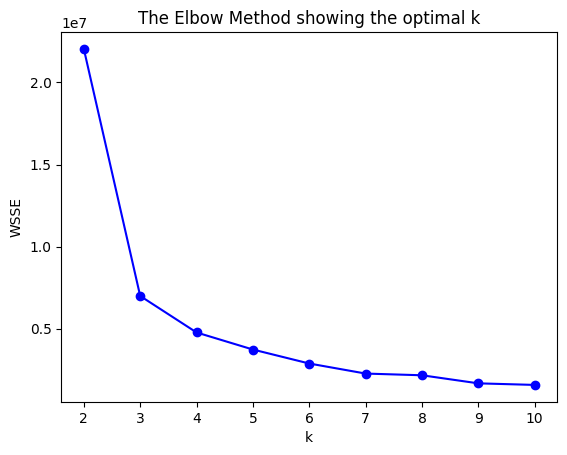

In [ ]:
# Plot the WSSE values
import matplotlib.pyplot as plt

plt.plot(range(2, 11), wsseList, 'bo-')
plt.xlabel('k')
plt.ylabel('WSSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhoutte Score

In [ ]:
# Create an array to hold the silhouette scores
silhouetteList = []

In [ ]:
# Calculate silhouette scores for k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(df_vfeatures.select('features'))
    predictions = model.transform(df_vfeatures)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouetteList.append(silhouette)
    print("With K =", k, "the silhouette score is", silhouette)

With K = 2 the silhouette score is 0.8530497080719324
With K = 3 the silhouette score is 0.891511132764563
With K = 4 the silhouette score is 0.8287307930955468
With K = 5 the silhouette score is 0.7293099594622616
With K = 6 the silhouette score is 0.7369878699822865
With K = 7 the silhouette score is 0.6972268869128376
With K = 8 the silhouette score is 0.7029329817008807
With K = 9 the silhouette score is 0.7382522029629914
With K = 10 the silhouette score is 0.7525453001896183


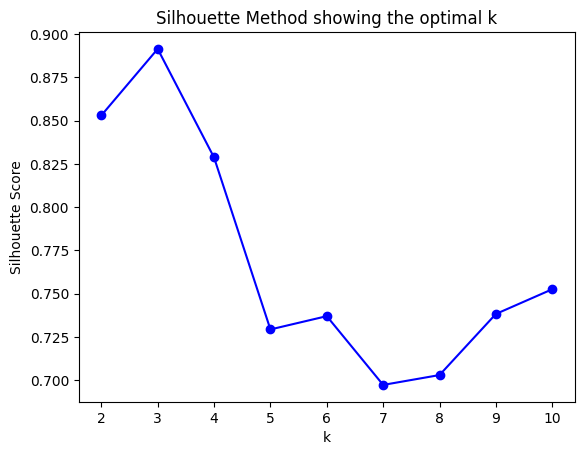

In [ ]:
# Plot the silhouette scores
plt.plot(range(2, 11), silhouetteList, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method showing the optimal k')
plt.show()

### Retraining Model with Optimized Parameters

Once we've found the best parameters using cross-validation, we can then retrain our model using these
parameters to hopefully get a performance boost.

In [ ]:
# Identify the optimal k from the plots
optimal_k = 4 # Enter the optimal k based on the plots

# Retrain the model with the optimal k
kmeans_optimal = KMeans().setK(optimal_k).setSeed(1)
final_model = kmeans_optimal.fit(df_vfeatures.select('features'))

## Model Evaluation

### Elbow Method

We'll compute the WSSE for the final model and compare it to our previous WSSE values. A lower WSSE
for the final model would indicate that our parameter tuning was successful.

In [ ]:
from pyspark.ml.clustering import KMeansModel
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col, sum
from pyspark.sql.functions import lit, when
from pyspark.sql.functions import coalesce

In [ ]:
# Create a DataFrame with the center and its index as a new column
df_center = transformed.select('features', 'prediction')

for i, center in enumerate(final_model.clusterCenters()):
    df_center = df_center.withColumn('center_{}'.format(i), lit(center))

# Define a UDF that computes the distance between a point and a center
def compute_distance(point, center):
    return float(Vectors.squared_distance(point, center))

compute_distance_udf = udf(compute_distance, FloatType())

In [ ]:
# Apply the UDF to compute the squared distance for each point in each cluster
for i in range(optimal_k):
    df_center = df_center.withColumn('squared_distance_{}'.format(i),
                                     when(col('prediction') == i,
                                          compute_distance_udf(col('features'), col('center_{}'.format(i))))
                                    )

In [ ]:
# Calculate the sum of squared distances for each row
wsse_columns = ['squared_distance_{}'.format(i) for i in range(optimal_k)]
df_center = df_center.withColumn('wsse', coalesce(*wsse_columns))

In [ ]:
# Calculate the total WSSE
wsse_final = df_center.select(sum('wsse')).first()[0]
print("The WSSE for the final model with K={0} is {1}".format(optimal_k, wsse_final))

The WSSE for the final model with K=4 is 4765214.582461476


### Silhoutte Score

In [ ]:
# Make predictions
predictions = final_model.transform(df_vfeatures)

In [ ]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

In [ ]:
silhouette = evaluator.evaluate(predictions)
print("The silhouette score for the final model with K={0} is {1}".format(optimal_k, silhouette))

The silhouette score for the final model with K=4 is 0.8287307930955468


## Visualization

Visualizations are key to understand both the data working with and the results of analysis. They can give you insights that are hard to see in raw data, and they are essential when you want to communicate findings to others.

### Data Visualization during Preprocessing

During preprocessing, it might be useful to get a sense of the distribution of data. For instance, if we have a feature like 'Aboard', 'Fatalities', or 'Ground' in our dataset, we might want to visualize their distribution.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Increase Memory

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName('app') \
    .config('spark.driver.memory', '8g') \
    .getOrCreate()

In [ ]:
histogram_data = df.select('Aboard').rdd.flatMap(lambda x: x).histogram(10)

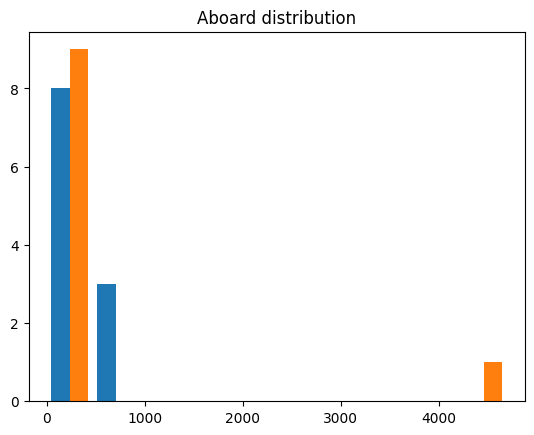

In [ ]:
plt.hist(histogram_data, bins=10)
plt.title('Aboard distribution')
plt.show()

In [ ]:
display(df.select("Aboard"))

DataFrame[Aboard: int]

In [ ]:
# # Convert Spark DataFrame to Pandas
# pandas_df = df.toPandas()

# # Plot a histogram of the 'Aboard' column
# pandas_df['Aboard'].hist()
# plt.title('Aboard distribution')
# plt.show()

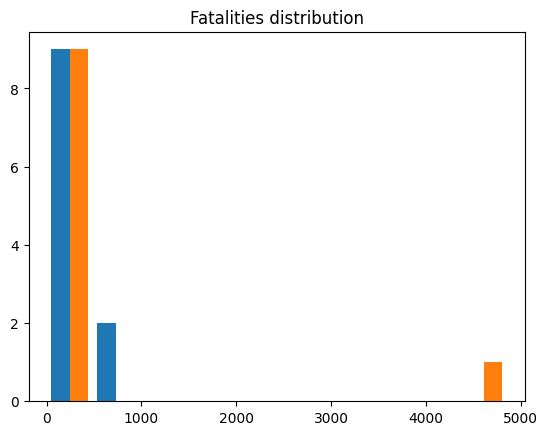

In [ ]:
histogram_data = df.select('Fatalities').rdd.flatMap(lambda x: x).histogram(10)

plt.hist(histogram_data, bins=10)
plt.title('Fatalities distribution')
plt.show()

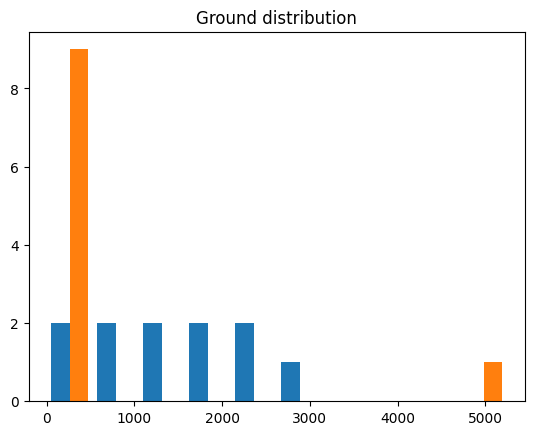

In [ ]:
histogram_data = df.select('Ground').rdd.flatMap(lambda x: x).histogram(10)

plt.hist(histogram_data, bins=10)
plt.title('Ground distribution')
plt.show()

### Data Visualization during Evaluation

Once the model is trained and evaluated, it's insightful to visualize how well the data points are clustered. We can create scatter plots where each point represents a data record, and the color of the point represents its assigned cluster.

Let's visualize the clusters based on two features, say 'Aboard' and 'Fatalities':

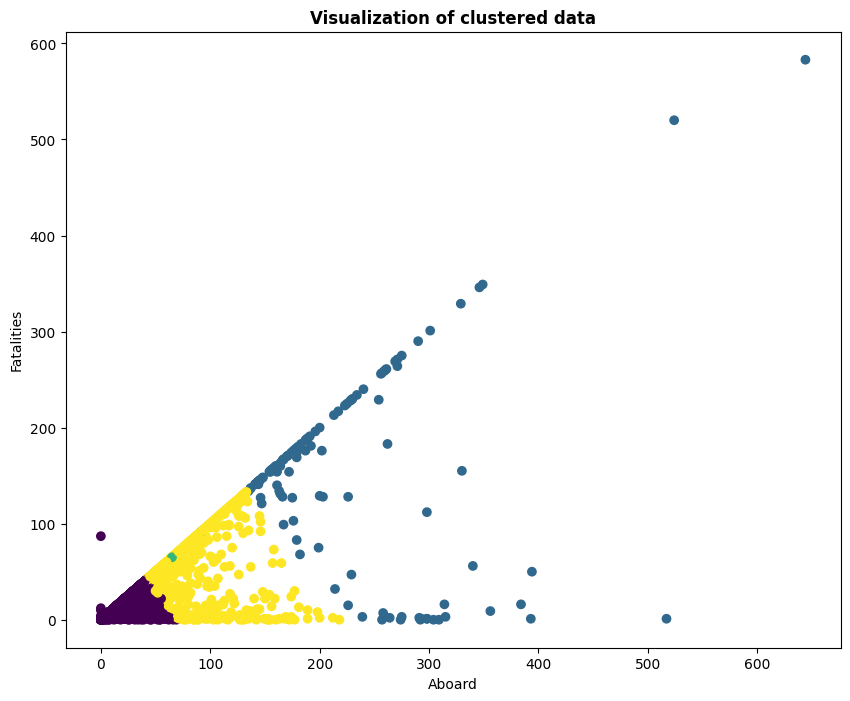

In [ ]:
# Get the predictions from the final model
predictions = final_model.transform(df_vfeatures)

# Convert to Pandas DataFrame
predictions_pandas = predictions.toPandas()

# Scatter plot of the 'Aboard' and 'Fatalities' features, colored by prediction
plt.figure(figsize=(10,8))
plt.scatter(predictions_pandas['Aboard'], predictions_pandas['Fatalities'], c=predictions_pandas['prediction'])
plt.title('Visualization of clustered data', fontweight='bold')
plt.xlabel('Aboard')
plt.ylabel('Fatalities')
plt.show()

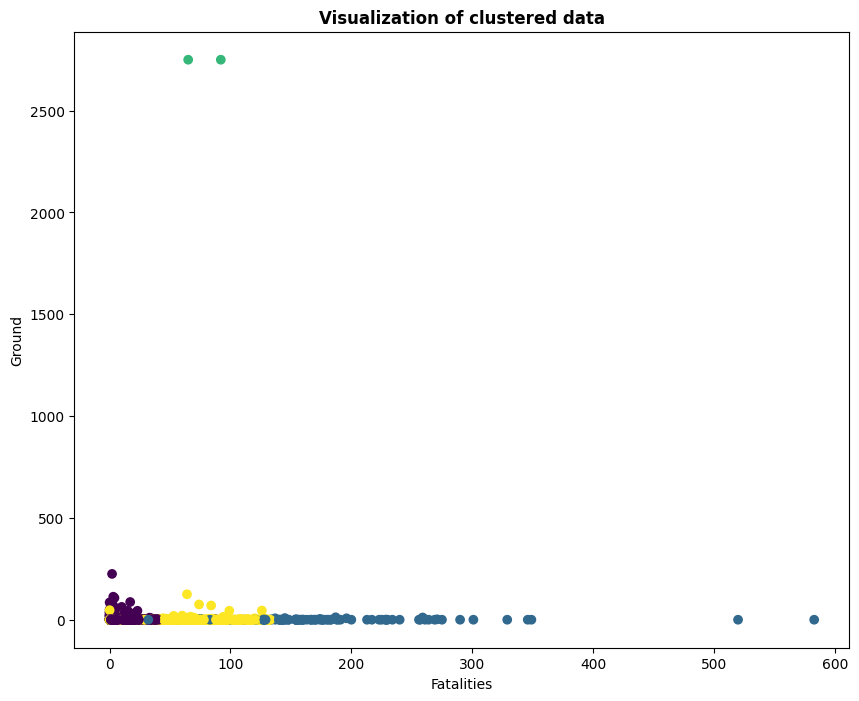

In [ ]:
# Scatter plot of the 'Fatalities' and 'Ground' features, colored by prediction
plt.figure(figsize=(10,8))
plt.scatter(predictions_pandas['Fatalities'], predictions_pandas['Ground'], c=predictions_pandas['prediction'])
plt.title('Visualization of clustered data', fontweight='bold')
plt.xlabel('Fatalities')
plt.ylabel('Ground')
plt.show()

#### Viusalization with Principal Component Analysis (PCA)

In [ ]:
from pyspark.ml.feature import PCA

# Apply PCA to transform the features to 2D
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(predictions)

result = model.transform(predictions)

In [ ]:
# Convert to Pandas DataFrame
result_pandas = result.select("prediction", "pcaFeatures").toPandas()

# Extract the two features from pcaFeatures
result_pandas["pcaFeatures"] = result_pandas["pcaFeatures"].apply(lambda x: [float(y) for y in x])
result_pandas[["pca1", "pca2"]] = pd.DataFrame(result_pandas["pcaFeatures"].to_list(), index=result_pandas.index)


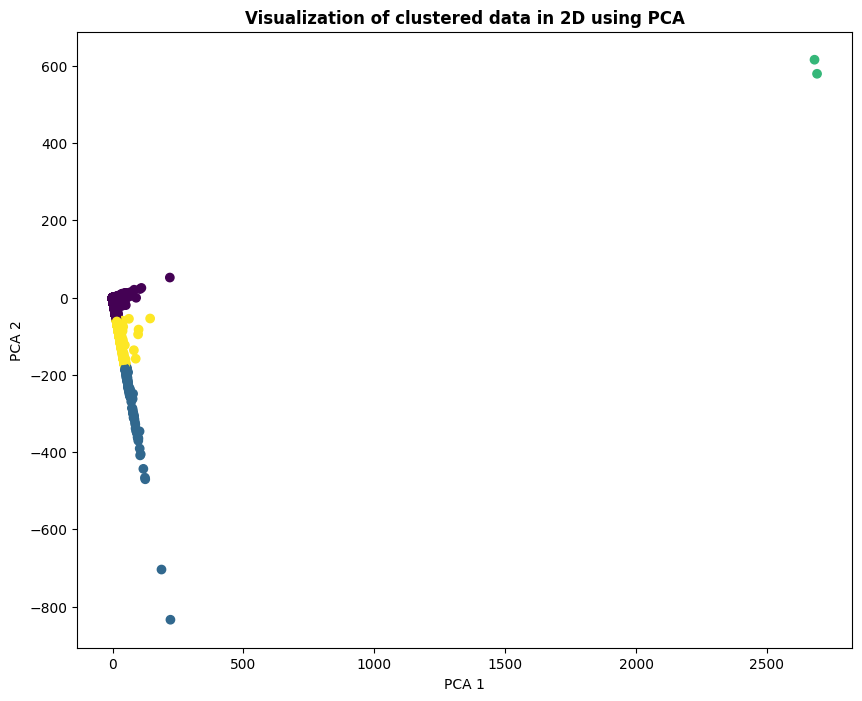

In [ ]:
# Scatter plot of the 'pca1' and 'pca2' features, colored by prediction
plt.figure(figsize=(10,8))
plt.scatter(result_pandas['pca1'], result_pandas['pca2'], c=result_pandas['prediction'])
plt.title('Visualization of clustered data in 2D using PCA', fontweight='bold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Conclusion

The purpose of this notebook was to illustrate how PySpark can be utilized for scalable data preprocessing, feature engineering, model training, hyperparameter tuning, model evaluation, and visualization in the context of a clustering task.

Throughout the analysis, handled missing values, normalized features, applied feature selection and transformation techniques, and prepared the data for K-Means clustering.

Two primary methods, the Elbow method and Silhouette score, applied for hyperparameter tuning. These methods helped us identify the optimal number of clusters, which was then used to retrain our K-Means model.

```
The final model with K=4, based on the optimal number of clusters identified, showed a Within Set Sum of Squared Errors (WSSE) of 4765214.582461476, demonstrating a high degree of cluster compactness. Additionally, the silhouette score was found to be 0.8287307930955468, which indicates that the clusters were well apart and had low overlap, suggesting good performance.```

## References

- Apache Spark. (n.d.). Apache Spark Documentation. https://spark.apache.org/docs/latest/index.html
- Resource in class Big Data
- Youtube
- Stackoverflow
- ChatGPT
- And many more